In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from janome.tokenizer import Tokenizer
import re
%matplotlib inline

In [4]:
#ファイル読み込み・確認
DATA_IN_PATH="C:/r_analysis/1.20221101/"
review_data=pd.read_csv(DATA_IN_PATH + 'data_complete_34814.csv',header=0,encoding="cp932")
print(review_data.head())

#データ数確認
print("total data : {}".format(len(review_data['review_cleansing'])))

# review_length_summary

review_length_max : 551
review_length_min : 15
review_length_mean : 83.0
review_length_std : 51.1
review_length_median : 69.0
review_length_25% : 49.0
review_length_75% : 103.0


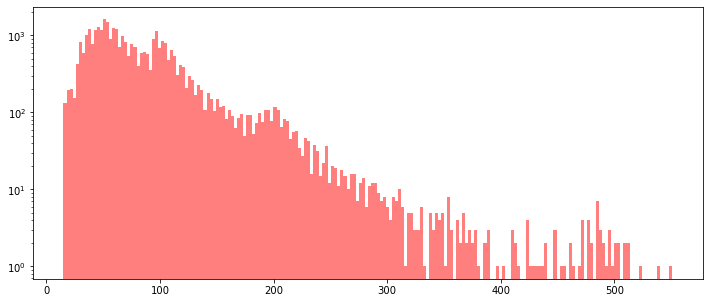

In [9]:
plt.figure(figsize=(12,5))
plt.hist(review_length, bins=200, alpha=0.5, color='r', label='文字数')
plt.yscale('log')

print('review_length_max : {}'.format(np.max(review_length)))
print('review_length_min : {}'.format(np.min(review_length)))
print('review_length_mean : {:.1f}'.format(np.mean(review_length)))
print('review_length_std : {:.1f}'.format(np.std(review_length)))
print('review_length_median : {}'.format(np.median(review_length)))
print('review_length_25% : {}'.format(np.percentile(review_length, 25)))
print('review_length_75% : {}'.format(np.percentile(review_length, 75)))

{'whiskers': [<matplotlib.lines.Line2D at 0x19753a55ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x19753a61340>,
 'boxes': [<matplotlib.lines.Line2D at 0x19753a559d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19753a61820>],
 'fliers': [<matplotlib.lines.Line2D at 0x19753a61dc0>],
 'means': [<matplotlib.lines.Line2D at 0x19753a61af0>]}

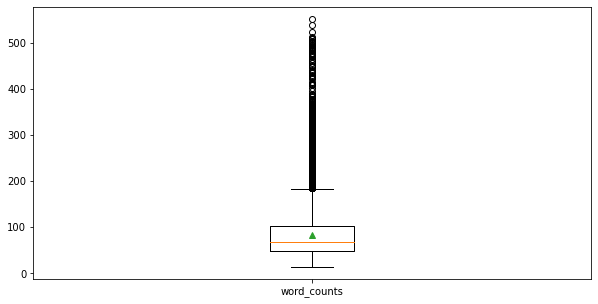

In [10]:
#boxplotで確認
plt.figure(figsize=(10,5))
plt.boxplot(review_length, labels=['word_counts'], showmeans=True)

# ワードクラウド

In [11]:
#形容詞、名詞だけ抽出
t = Tokenizer()
words = []
word_dic = {}

for i, rows in review_data.iterrows():
    malist = t.tokenize(rows['review_cleansing'])  # データフレイムで列指定
    for line in malist:
        word = line.surface  #トークン化した単語をセーブ
        tmp = line.part_of_speech.split(",") #トークン化した単語の情報
    
        if tmp[0] in ["名詞"]:  #第1品詞は名詞
            if tmp[1] in ["一般", "固有名詞"]: #第2品詞が一般名詞or固有名詞であれば
                words.append(word)  #トークン化した単語そのままリストに入れる
        if tmp[0] in ["形容詞"]:  #第1品詞が形容詞であれば
            words.append(word.base_form) #トークン化した単語の原形をリストに入れる。トークン化した単語そのまま入れたいなら、 .base_formを除去
            
        if tmp[0] in ["形容詞", "名詞"]:  # 第1品詞は名詞か形容詞であって
            if not word in word_dic: # word_dicに該当する単語が無ければ、
                word_dic[word] = 0  # 該当する単語を0にして追加
            else:
                word_dic[word] += 1  #中腹であれば+1をカウントする
            
# words リストにある単語をtext変数に指定し、txtファイルにする
text= " " . join(words)  

with open('wakati1.txt', 'w', encoding='utf-8') as f:
    f.write(text) # txt파일로 저장함 (얘는 구지 필요없음)
 
print("終わりました")

finish


In [12]:
#リストに入っている単語を全文表示
keys = sorted(word_dic.items(), key= lambda x:x[1], reverse=True)
for word, cnt in keys[0:]:
    print("{0}({1})".format(word, cnt), end=" | ")

こと(17620) | 研修(11231) | 人(9912) | 仕事(9743) | 自分(6855) | ため(6817) | の(6682) | 的(6205) | お客様(5288) | 会社(5226) | よう(4921) | 成長(4706) | 社員(4654) | ない(4644) | 多い(4377) | 時(4328) | やりがい(4320) | 方(4224) | 事(4137) | 業務(3944) | 教育(3566) | 営業(3485) | 制度(3222) | キャリア(3018) | スキル(2959) | 環境(2923) | 多く(2833) | 上司(2720) | それ(2515) | 知識(2475) | 良い(2453) | 入社(2446) | 経験(2437) | 力(2355) | 部署(2327) | 時間(2277) | 資格(2276) | 身(2266) | もの(2225) | アップ(2118) | 点(2118) | 店舗(2102) | 一(2085) | 者(2079) | 年(2074) | 1(2072) | 何(2064) | やすい(2064) | 必要(2048) | 評価(1943) | 勉強(1934) | いい(1911) | 目標(1840) | とき(1768) | 為(1757) | 基本(1749) | 接客(1723) | 社内(1706) | ところ(1698) | 対応(1629) | 現場(1620) | 内容(1615) | 商品(1612) | 充実(1610) | 等(1605) | 個人(1598) | 機会(1564) | 働きがい(1558) | 中(1552) | 企業(1530) | 感(1498) | 管理(1452) | 達成(1439) | 上(1362) | なく(1353) | 場合(1318) | 社会(1311) | 関係(1286) | 取得(1267) | 技術(1250) | 後(1246) | 能力(1242) | 自身(1230) | 職(1226) | 様々(1225) | 性(1223) | 相談(1194) | 感謝(1187) | さん(1165) | 開発(1163) | 目(1161) | 先(1159) |

 | 離職(64) | 年度(63) | 定時(63) | もと(63) | 人脈(63) | ダイレクト(63) | 元気(63) | 額(63) | 職業(63) | 正しい(63) | 書類(63) | 写真(63) | 定着(62) | わり(62) | ショップ(62) | 正規(62) | 改革(62) | 頻度(62) | 丸(62) | 空気(62) | 対面(62) | ゼロ(62) | 曖昧(62) | 志向(62) | 業者(62) | 楽しみ(62) | 狭い(62) | 先生(62) | 応用(62) | 夢(62) | キャンペーン(62) | 有利(61) | 地(61) | 程(61) | 初心者(61) | 最適(61) | 各自(61) | 勝手(61) | マーケティング(61) | 産業(60) | 遅く(60) | 式(60) | 40(60) | 手続き(60) | セールス(60) | 安く(60) | 手法(60) | あたり(60) | 感動(60) | 特(60) | 身近(60) | 既存(60) | ELEARNING(60) | 更新(59) | 上下(59) | アンケート(59) | コスト(59) | お話し(59) | 難易(59) | 街(59) | テキスト(59) | 限定(59) | クリア(59) | 良(59) | しんどい(59) | 署(59) | 退社(59) | 的確(59) | 免許(59) | 化粧(59) | 健康(58) | 定年(58) | 意志(58) | 寛容(58) | ハード(58) | 配慮(58) | 転換(58) | 授業(57) | スペシャリスト(57) | 皆さん(57) | 新しく(57) | 難い(57) | 独り立ち(57) | 尊重(57) | 6(57) | 人前(57) | 許可(57) | キャスト(57) | 合宿(56) | 率先(56) | 対処(56) | 上手(56) | 在庫(56) | ミッション(56) | 知見(56) | 制限(56) | 介護(56) | 専用(56) | いくつ(56) | お願い(56) | 加工(56) | おおい(56) | 特定(56) | 随時(56) | 向き(56) | 世(56) |

 | むしろ(14) | 面白く(14) | 飽和(14) | 平気(14) | 直近(14) | 軽く(14) | 気味(14) | 町(14) | 統合(14) | 詰め(14) | ダウン(14) | 夏(14) | 馴染み(14) | 倉庫(14) | 有能(14) | AI(14) | 許容(14) | くせ(14) | 生きがい(14) | 券(14) | 顔色(14) | 原動力(14) | 職歴(14) | 図面(14) | 戦(14) | そ(14) | お昼(14) | 短縮(14) | 法務(14) | 文系(14) | 定型(14) | 利(14) | 上乗せ(14) | 現時点(14) | 公開(14) | いい加減(14) | たて(14) | 細やか(14) | 不思議(14) | だし(14) | 穏やか(14) | 助成(14) | 民間(14) | 悪化(14) | 論文(14) | 単独(14) | ナンバーワン(14) | 半額(14) | 完備(14) | 有(14) | 遵守(14) | 発売(14) | 中国語(14) | 見積もり(14) | 通達(14) | 不便(14) | ロケーション(14) | ジェネラリスト(14) | スポット(14) | 病(14) | お陰(14) | 替え(14) | 不安定(14) | 枚(14) | 気さく(14) | 道のり(14) | 天職(14) | 地獄(14) | リーディング(14) | 計測(14) | 前回(14) | 忙殺(14) | すき(14) | 早朝(14) | 気配り(14) | 放題(14) | 履歴(14) | いや(14) | 表向き(14) | 引渡し(14) | 着工(14) | 決め方(14) | 涙(14) | だめ(14) | 未熟(14) | 親(14) | 軒(14) | 返事(14) | 安(14) | 弁当(14) | コンビニエンスストア(14) | ドリンク(14) | 良品(14) | ハンバーガー(14) | ドラッグストア(14) | 無印(14) | テレマーケティング(14) | バンク(14) | 赤ちゃん(14) | 伊藤園(14) | 志望校(14) | 被害(13) | 等々(13) | 改良(13) | 

 | 物凄く(4) | 類似(4) | 組立(4) | 存続(4) | 好意(4) | 処方(4) | 土曜(4) | 薬品(4) | おまけ(4) | アテ(4) | 付属(4) | 根強い(4) | クビ(4) | 道しるべ(4) | 定性的(4) | まずい(4) | 血(4) | サプライヤ(4) | リテラシー(4) | 古風(4) | ナショナルクライアント(4) | 絵(4) | 受託(4) | 北海道(4) | 放棄(4) | 前線(4) | きょう(4) | 年中(4) | よっぽど(4) | 入り口(4) | 派手(4) | 息抜き(4) | 平準(4) | 閉塞(4) | 遅延(4) | 補完(4) | ガッツ(4) | さばさば(4) | 症(4) | 一因(4) | パンク(4) | テクニカル(4) | 突出(4) | 投げやり(4) | 平行(4) | リラックス(4) | かし(4) | OP(4) | 実生活(4) | 受信(4) | バラバラ(4) | 労(4) | 私語(4) | 長かっ(4) | 2030(4) | レンジ(4) | 下地(4) | 軽視(4) | 密か(4) | つまらなく(4) | コンサル(4) | 桁(4) | 嵐(4) | 盛り上がり(4) | ムダ(4) | 売却(4) | ふり(4) | こなし(4) | 年始(4) | 劣化(4) | コーチング(4) | 実家(4) | 通い(4) | OA(4) | 祭(4) | 汗だく(4) | 鋳造(4) | 口座(4) | オールマイティ(4) | 官僚(4) | 其(4) | 無関係(4) | 再編(4) | ズレ(4) | 凍結(4) | 言い訳(4) | ELERNING(4) | 部外(4) | 念頭(4) | 洗濯(4) | 販社(4) | 永年(4) | 寸前(4) | パスポート(4) | 致し方(4) | 経緯(4) | 礼状(4) | 古臭い(4) | 観念(4) | 立ち居(4) | 半面(4) | スズキ(4) | 若(4) | かに(4) | 精鋭(4) | 分割(4) | フリーエージェント(4) | ブレーク(4) | 易(4) | チャン(4) | LSI(4) | ヒット(4) | タイムリー(4) | 即決(4) | 

犯人(2) | 正面(2) | ディップ(2) | ES(2) | エデュケーター(2) | 来館(2) | 代務(2) | アルペン(2) | ERP(2) | プログラマ(2) | スキン(2) | ジーンズ(2) | ゲオ(2) | コンプレックス(2) | 毛髪(2) | 頭部(2) | マシニングセンター(2) | 形状(2) | ヤオコー(2) | アドバンス(2) | サイバーエージェント(2) | 留守(2) | 模型(2) | ステップアッブ(2) | 集荷(2) | 躍進(2) | 福山通運(2) | トン(2) | パフェ(2) | 住友林業(2) | 所員(2) | ヨソ(2) | 相撲(2) | 大関(2) | 関脇(2) | 外輪(2) | 無駄遣い(1) | 令和(1) | 重厚(1) | 長大(1) | 再会(1) | 注入(1) | 補修(1) | クレー(1) | KDDI(1) | プラチナ(1) | ゴネ(1) | 平時(1) | スキルアップ(1) | 異議(1) | MP(1) | 号令(1) | 悪口(1) | 不測(1) | 深堀(1) | 俗人(1) | 排他(1) | すれ違い(1) | 代償(1) | はげしい(1) | 付きっ切り(1) | 飯田橋(1) | MVNO(1) | 風邪(1) | 仲間入り(1) | 半永久(1) | チャラ(1) | かたい(1) | 調和(1) | TOEICIP(1) | BIG(1) | 欠席(1) | 最小(1) | 陰口(1) | 質感(1) | やあ(1) | 招集(1) | アイシン(1) | 当番制(1) | まい進(1) | 卸(1) | 代替(1) | ワクチン(1) | ラリー(1) | 接種(1) | 気の毒(1) | 使い勝手(1) | 紙背(1) | 明示(1) | 出庫(1) | 課税(1) | 疑わしい(1) | 広義(1) | 卸売(1) | CDP(1) | 手放し(1) | ITIL(1) | クリティカル(1) | いすゞ(1) | 偽り(1) | ガラパゴス(1) | 肩代わり(1) | 昇華(1) | 電器(1) | 枯渇(1) | 89(1) | 助け舟(1) | 中継(1) | 乱暴(1) | テンポ(1) | こまかく(1) | 

アイウェア(1) | フィッティング(1) | つう(1) | 貸金(1) | 几帳面(1) | MT(1) | 加給(1) | 妻(1) | 割賦(1) | 交友(1) | サバイバル(1) | テクニカルサポート(1) | メチャクチャ(1) | 区役所(1) | 不愉快(1) | 月頃(1) | 妄想(1) | かお(1) | 断念(1) | バディ(1) | メンズ(1) | 立て続け(1) | シューズ(1) | マート(1) | 保存(1) | スプレー(1) | ソムリエ(1) | サプライズ(1) | 付き物(1) | 理容(1) | ブライダル(1) | 構図(1) | 変身(1) | スタジオアリス(1) | 病みつき(1) | 幼児(1) | がたく(1) | お母様(1) | フォト(1) | 宮参り(1) | デポ(1) | 壮年(1) | 聞にくい(1) | だる(1) | 喪失(1) | アド(1) | CIOCFO(1) | ホット(1) | 参観(1) | 美しく(1) | 管掌(1) | ライトオン(1) | ワガママ(1) | 丈(1) | 並び(1) | 売価(1) | ホビー(1) | 古(1) | 発達(1) | 自作(1) | 需(1) | 仕切り(1) | 丼(1) | ガチャポン(1) | 鼻(1) | サラッ(1) | 電送(1) | リプレイス(1) | つくり(1) | かつら(1) | 残留(1) | 増毛(1) | 頭皮(1) | 音響(1) | かいしゃ(1) | スリ(1) | ネクステージ(1) | 並べ方(1) | モテ(1) | ハイエンド(1) | 唯(1) | 目利き(1) | YAHOOGOOGLE(1) | ライティング(1) | コミュニケ(1) | 番手(1) | 埼玉(1) | 心待ち(1) | 見回り(1) | 150(1) | サード(1) | 控え(1) | 棚下(1) | 123(1) | 問診(1) | 八ヶ岳(1) | 一個人(1) | 学年(1) | すてき(1) | 少子化(1) | コマ(1) | 5050(1) | 宿(1) | 福山(1) | スクルアップ(1) | 積み(1) | 日曜(1) | ほうれんそう(1) | 能(1) | プライベートブランド(1)

寡黙(0) | 先取(0) | リーダーシップフォロワー(0) | 休診(0) | 最下(0) | ダイバシティ(0) | SYSTEMATIC(0) | タイムング(0) | 腰掛(0) | 入校(0) | 三種(0) | 矜持(0) | 莫迦(0) | 悪しく(0) | デッドオアアライブ(0) | 千尋(0) | 谷(0) | 目視(0) | 大がかり(0) | ままならなく(0) | 泥棒(0) | 同日(0) | 妨害(0) | 豊(0) | 筆記用具(0) | もったいなく(0) | スキルマネジメントスキルヒアリング(0) | パワポスキル(0) | 足跡(0) | マル(0) | 代替わり(0) | RTM(0) | 硬度(0) | ワンステップ(0) | NA(0) | 息づかい(0) | 眠たい(0) | MNP(0) | 気長(0) | 新旧(0) | 雑然(0) | 鱗(0) | セリフ(0) | ぃと(0) | 眠たく(0) | 折々(0) | うろ覚え(0) | ウロコ(0) | 冷や汗(0) | 笑声(0) | 激高(0) | 焦点(0) | 遅けれ(0) | あまく(0) | めんどくさかっ(0) | メッシ(0) | クリロナ(0) | 数式(0) | 設け(0) | 親近(0) | フォローアップキャリアチェンジ(0) | 骨組み(0) | 口ぐせ(0) | バレンタイン(0) | 誤字(0) | 陳腐(0) | マナーメールマナー(0) | 出たとこ勝負(0) | お粗末(0) | 予習(0) | テレマメール(0) | 文字数(0) | お力(0) | ちぐはぐ(0) | TPO(0) | ゃいけなくなってしまったのはちょっと(0) | 眼精疲労(0) | チカ(0) | ユーズ(0) | 地下(0) | オフィイス(0) | 処(0) | 差し替え(0) | ペースト(0) | 秋(0) | 確執(0) | 棘(0) | スキルチェンジ(0) | ヘッジファンド(0) | フォローワー(0) | ソリューションセンター(0) | 手落ち(0) | みじかく(0) | 雨後(0) | スキルアップステップアップ(0) | 長短(0) | 酢(0) | 取り次ぎ(0) | 宜しい(0) | 善し悪し(0) | 総務庁(0) | 

 | 難事(0) | マイセレクト(0) | 生存(0) | 餌(0) | ドロップ(0) | 近親(0) | 体外(0) | けが(0) | きめ細か(0) | 歯痒(0) | 三流(0) | もやもや(0) | 舵取り(0) | 洋品(0) | 表参道(0) | 御徒(0) | 青山商事(0) | キャリアアップペース(0) | 葬祭(0) | カジュアル(0) | 一張羅(0) | 近頃(0) | お買い得(0) | 着こなし(0) | 放映(0) | 講(0) | イタリア(0) | 当分(0) | 増員(0) | チーフサブマネージャー(0) | 乏しけれ(0) | 痒い(0) | ポジティブシンキング(0) | パンチ(0) | リクルートスーツ(0) | 一式(0) | 過不足(0) | 入管(0) | 舌打ち(0) | スタジアム(0) | にこにこ(0) | 口うるさい(0) | ウィンドウ(0) | キャップ(0) | でかく(0) | 停車(0) | ゅうりょも(0) | 久留米岩田屋(0) | ース(0) | 気持ち良(0) | 生花(0) | 森永製菓(0) | 気持(0) | 原資(0) | ぱかりてすしかし(0) | 前借り(0) | 試合(0) | 気疲れ(0) | いちじるしく(0) | 用件(0) | 合否(0) | 住所(0) | ゅうりょぅがいいから(0) | びそれを(0) | う(0) | 封入(0) | 且早(0) | 取り引き(0) | MAIL(0) | いよ(0) | 助手(0) | MOS(0) | 程よく(0) | イラ(0) | 外装(0) | 塩分(0) | 家財道具(0) | 搬出(0) | 真夏(0) | 縄(0) | 手離れ(0) | 義理(0) | 僧(0) | 未払い(0) | 相容れない(0) | 寄せ書き(0) | 堺(0) | 120130(0) | 売り切り(0) | じきじき(0) | 一軒家(0) | 新入り(0) | 役得(0) | 転機(0) | 入口(0) | 物静か(0) | 細身(0) | とまどい(0) | 無断(0) | 怪訝(0) | ごころ(0) | キズ(0) | アク(0) | エディオンアプリ(0) | 氏名(0) | キツイクレーム(0) | ニパターン(0)

懐かしく(0) | ケータリング(0) | もも(0) | フェイシャルマッサージ(0) | フェイシャルデビュー(0) | チェックカウンセリングフェイシャルケア(0) | フェイシャルケア(0) | チ(0) | づつですができるようになったと(0) | フェイシャリストデビュー(0) | 美顔(0) | パビリオン(0) | クレンジング(0) | 液(0) | 大部屋(0) | ベッド(0) | 寝心地(0) | ズバッ(0) | 生暖かい(0) | フェイシャル(0) | ヘッドスパリフレクソロジー(0) | でまかせ(0) | さっき(0) | 通行人(0) | エステ(0) | 一品(0) | 感慨深(0) | 目玉(0) | 改修(0) | オーソドックス(0) | からき(0) | 色濃い(0) | 適量(0) | 面子(0) | スーパゼネコン(0) | ばば(0) | たっぷり(0) | パトロール(0) | 

In [14]:
#stop wordを除去
#日本語stop wordを読み込み
stopword=pd.read_csv(DATA_IN_PATH + "Japanese.txt" ,header=0)

#データフレイムを作成
stopword_list=[]

#追加したいstop wordを追加
stop_words = [ u'こと', u'人', u'よう', u'多い', u'ん', u'方', u'ため',u'そう', u'これ', u'もの', u'ない',u'の',
            u'良く',u'社員',u'多く',u'者',u'会',u'部署',u'企業',u'やすい',u'上司',u'環境',u'時間',u'性',u'同士',u'自分',
             u'自分',u'基本',u'女性',u'組織',u'社風',u'いい',u'印象',u'事',u'業務',u'系',u'人間',u'店舗',u'ところ',u'職場',
             u'なく',u'外国',u'体育',u'気',u'もの',u'文化',u'1',u'何',u'力',u'さ',u'強い',u'高い']

#stop wordにダウンロードしたstop wordと追加したいstop wordを全部入れる
for i in stopword['a']:
    stopword_list.append(i)
    
for i in stop_words:
    stopword_list.append(i)  

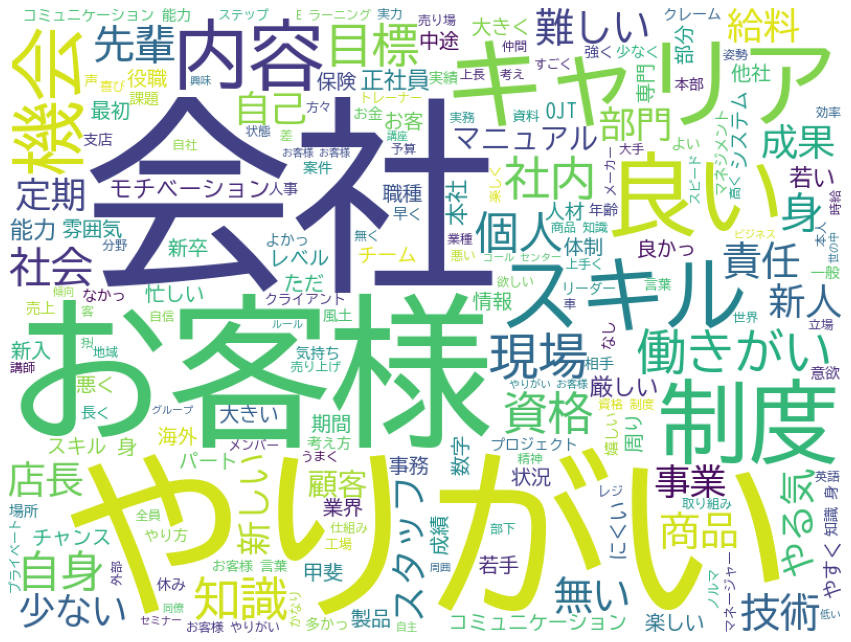

In [15]:
#ワードクラウド作成
wc = WordCloud(background_color="white", width=800, height=600, font_path="C:/Windows/Fonts/BIZ-UDGothicR.ttc", 
               stopwords=set(stopword_list))
wc.generate(text)  
plt.figure(figsize=(15,12))
plt.imshow(wc)
plt.axis("off")
plt.show()

# トークン数に関する探索的分析（EDA）

In [16]:
#ライブラリ読み込み
from transformers import *

C:\Users\kimpa\anaconda3\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [17]:
#tokenizer読み込み
model_name_bert = "cl-tohoku/bert-base-japanese-v2" 

model = TFBertModel.from_pretrained(model_name_bert, cache_dir='bert_ckpt' )
tokenizer = BertJapaneseTokenizer.from_pretrained(model_name_bert, cache_dir='bert_ckpt')

https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/config.json not found in cache or force_download set to True, downloading to C:\Users\kimpa\20221101bert모든코딩\bert_ckpt\tmpf1i5d49n


storing https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/config.json in cache at bert_ckpt\6ca2de6dee8b1a5ec94e400e942b44d70a86cd90c211ff7a7123acec2a4b1cdd.6a0ed48d70c8b9e5a276fc6ffdf424ecfb6598f05121c90cf52a781084a8cde4
creating metadata file for bert_ckpt\6ca2de6dee8b1a5ec94e400e942b44d70a86cd90c211ff7a7123acec2a4b1cdd.6a0ed48d70c8b9e5a276fc6ffdf424ecfb6598f05121c90cf52a781084a8cde4
loading configuration file https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/config.json from cache at bert_ckpt\6ca2de6dee8b1a5ec94e400e942b44d70a86cd90c211ff7a7123acec2a4b1cdd.6a0ed48d70c8b9e5a276fc6ffdf424ecfb6598f05121c90cf52a781084a8cde4
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings":

storing https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/tf_model.h5 in cache at bert_ckpt\04d527f1b83e7eedbb162e75f5a6ceb5e15d059109bdc75c40bc0c0e939d047f.b3ecc27e1eaa9a6f9de04d4d156cf1895222416188cd818539151e9c513ffe8f.h5
creating metadata file for bert_ckpt\04d527f1b83e7eedbb162e75f5a6ceb5e15d059109bdc75c40bc0c0e939d047f.b3ecc27e1eaa9a6f9de04d4d156cf1895222416188cd818539151e9c513ffe8f.h5
loading weights file https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/tf_model.h5 from cache at bert_ckpt\04d527f1b83e7eedbb162e75f5a6ceb5e15d059109bdc75c40bc0c0e939d047f.b3ecc27e1eaa9a6f9de04d4d156cf1895222416188cd818539151e9c513ffe8f.h5
Some layers from the model checkpoint at cl-tohoku/bert-base-japanese-v2 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassific

storing https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/vocab.txt in cache at bert_ckpt\dc462194780c4638f894e183eec0e214c2891e32a0276d8437e019b6cafd4961.49eeeaed2051802f574bb8508bc9b90ddd068743c7b9c17dd1afcc18c5fc82fd
creating metadata file for bert_ckpt\dc462194780c4638f894e183eec0e214c2891e32a0276d8437e019b6cafd4961.49eeeaed2051802f574bb8508bc9b90ddd068743c7b9c17dd1afcc18c5fc82fd
https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to C:\Users\kimpa\20221101bert모든코딩\bert_ckpt\tmp8z2r639i


storing https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/tokenizer_config.json in cache at bert_ckpt\61a610717b862ec3ecfe65906e562e43eabf578f35c8fe23c7822a66de0c9821.8e4e731c1d54dbc728a7894b3ad143b386987a5f85322fdc7685570a9ec962e3
creating metadata file for bert_ckpt\61a610717b862ec3ecfe65906e562e43eabf578f35c8fe23c7822a66de0c9821.8e4e731c1d54dbc728a7894b3ad143b386987a5f85322fdc7685570a9ec962e3
loading file https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/vocab.txt from cache at bert_ckpt\dc462194780c4638f894e183eec0e214c2891e32a0276d8437e019b6cafd4961.49eeeaed2051802f574bb8508bc9b90ddd068743c7b9c17dd1afcc18c5fc82fd
loading file https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/cl-tohoku/bert-base-japanese-v2/resolve/main/tokenizer_confi

In [18]:
#レビューデータをembeddingして、トークン化する
train_bert_token_counts = review_data['review_cleansing'].apply(lambda x : len(tokenizer.tokenize(x)))

number of token max :352
number of token min :4
number of token mean :51.4
number of token std :32.1
number of token median :43.0
number of token 25% :30.0
number of token 75% :64.0
number of token 80% :69.0
number of token 85% :75.0
number of token 90% :88.0
number of token 95% :117.0
number of token 97% :131.0
number of token 99% :164.0


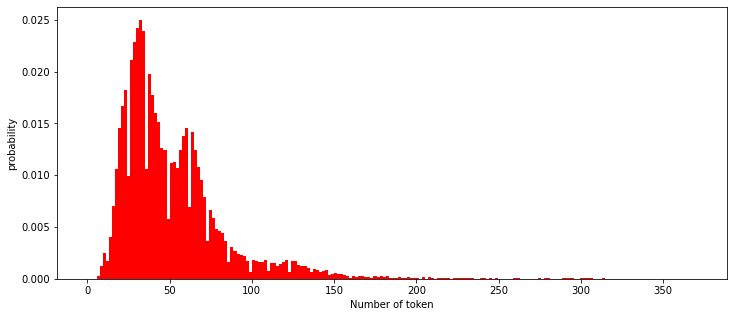

In [19]:
#レビューデータのトークン数に対して統計量を出す
plt.figure(figsize=(12,5))
plt.hist(train_bert_token_counts, bins=200, range=[0,370], facecolor='r', density=True, label='train')
plt.xlabel('Number of token', fontsize=10)
plt.ylabel('probability', fontsize=10)

print('number of token max :{}'.format(np.max(train_bert_token_counts)))
print('number of token min :{}'.format(np.min(train_bert_token_counts)))
print('number of token mean :{:.1f}'.format(np.mean(train_bert_token_counts)))
print('number of token std :{:.1f}'.format(np.std(train_bert_token_counts)))
print('number of token median :{}'.format(np.median(train_bert_token_counts)))
print('number of token 25% :{}'.format(np.percentile(train_bert_token_counts,25)))
print('number of token 75% :{}'.format(np.percentile(train_bert_token_counts,75)))
print('number of token 80% :{}'.format(np.percentile(train_bert_token_counts,80)))
print('number of token 85% :{}'.format(np.percentile(train_bert_token_counts,85)))
print('number of token 90% :{}'.format(np.percentile(train_bert_token_counts,90)))
print('number of token 95% :{}'.format(np.percentile(train_bert_token_counts,95)))
print('number of token 97% :{}'.format(np.percentile(train_bert_token_counts,97)))
print('number of token 99% :{}'.format(np.percentile(train_bert_token_counts,99)))